In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls /raid/AISSEL/Hamed/datasets/all_topics

caption_stage1_train_all_topics.tsv  caption_val_all_topics.tsv  train
caption_stage2_train_all_topics.tsv  checkpoint_best.pt		 val
caption_test_all_topics.tsv	     stage2_checkpoints_best.pt


In [3]:
saved_path = '/raid/AISSEL/Hamed/datasets/all_topics'

In [4]:
val_dir = '/raid/AISSEL/Hamed/datasets/all_topics/val'
train_dir = '/raid/AISSEL/Hamed/datasets/all_topics/train'
! mkdir -p /raid/AISSEL/Hamed/datasets/all_topics/val
! mkdir -p /raid/AISSEL/Hamed/datasets/all_topics/train

In [5]:
cal = ['image_id', 'id', 'caption', 'labels', 'image']
df_t = pd.read_csv(f'{saved_path}/caption_stage1_train_all_topics.tsv', sep='\t', names=cal)
df_v = pd.read_csv(f'{saved_path}/caption_stage2_train_all_topics.tsv', sep='\t', names=cal)
df_t['id'] = np.arange(len(df_t))
df_t['image_id'] = np.arange(len(df_t))
del df_t['labels']

df_v['id'] = np.arange(start=len(df_t), stop=len(df_t) + len(df_v))
df_v['image_id'] = np.arange(start=len(df_t), stop=len(df_t) + len(df_v))
del df_v['labels']

df_t

,image_id,id,caption,image
0,0,0,A freight train crossing a railway bridge at t...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,1,1,An inbound streetcar at Central Avenue station...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,2,2,A Japanese utility cart known as Rearcar jaリヤカ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,3,3,Chrysler PT Cruiser convertible Deutsch Chrysl...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,4,4,A public transport bus in Chandigarh English A...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...
3055,3055,3055,Photo taken in the Yellowstone area,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3056,3056,3056,A pedestrian path along the Vancouver Seawall,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3057,3057,3057,Stone Mountain Park Georgia USA,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3058,3058,3058,Black Canyon of the Yellowstone River near Ga...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [6]:
df_v

,image_id,id,caption,image
0,3060,3060,Early tram routes through Railway Square Trams...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,3061,3061,Model of the bus at InnoTrans 2016 InnoTrans 2...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,3062,3062,Captain SMRT Singapores Mass Rapid Transit dem...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,3063,3063,Magsaysay Municipal Public Bus Terminal Englis...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,3064,3064,A PCC streetcar turning off 36th Street toward...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...
606,3666,3666,Chester A Arthur and party Yellowstone Nationa...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
607,3667,3667,Deckchairs in Hyde Park London English Hyde Pa...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
608,3668,3668,Presto card reader at Promenade Terminal Engli...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
609,3669,3669,One of the Parking decks at Parks Mall English...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [7]:
import base64
from PIL import Image
import io
from IPython.display import Image as IImage

In [8]:
def b64_to_jpg(row, s='train'):
#     print(row[1], row[4])
#     print(f'*************************')
    image = base64.b64decode(row[3])
    if s == 'val':
        root_dir = val_dir
    else:
        root_dir = train_dir
            
    name = root_dir + '/' + str(row[0])+'.jpg'
    
    image_result = open(name, 'wb')
    image_result.write(image)
    image_result.close()
    return name

In [9]:
df_v['path'] =df_v.apply(b64_to_jpg, s='val', axis=1)
df_v

,image_id,id,caption,image,path
0,3060,3060,Early tram routes through Railway Square Trams...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
1,3061,3061,Model of the bus at InnoTrans 2016 InnoTrans 2...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
2,3062,3062,Captain SMRT Singapores Mass Rapid Transit dem...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
3,3063,3063,Magsaysay Municipal Public Bus Terminal Englis...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
4,3064,3064,A PCC streetcar turning off 36th Street toward...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
...,...,...,...,...,...
606,3666,3666,Chester A Arthur and party Yellowstone Nationa...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...
607,3667,3667,Deckchairs in Hyde Park London English Hyde Pa...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...
608,3668,3668,Presto card reader at Promenade Terminal Engli...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...
609,3669,3669,One of the Parking decks at Parks Mall English...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...


In [10]:
df_t['path'] = df_t.apply(b64_to_jpg, s='train', axis=1)

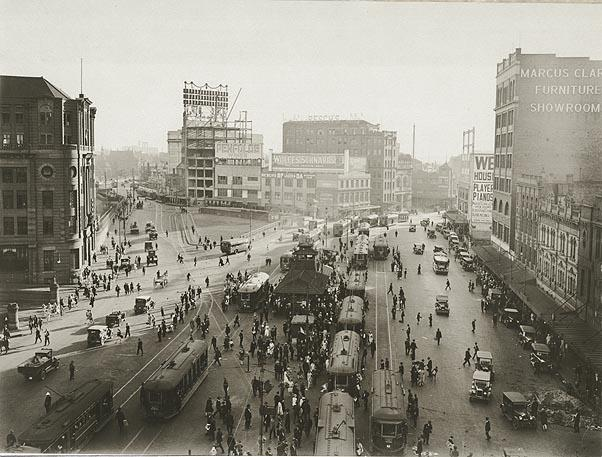

In [11]:
IImage(filename=f'{val_dir}/3060.jpg', width = 300, height = 200) 

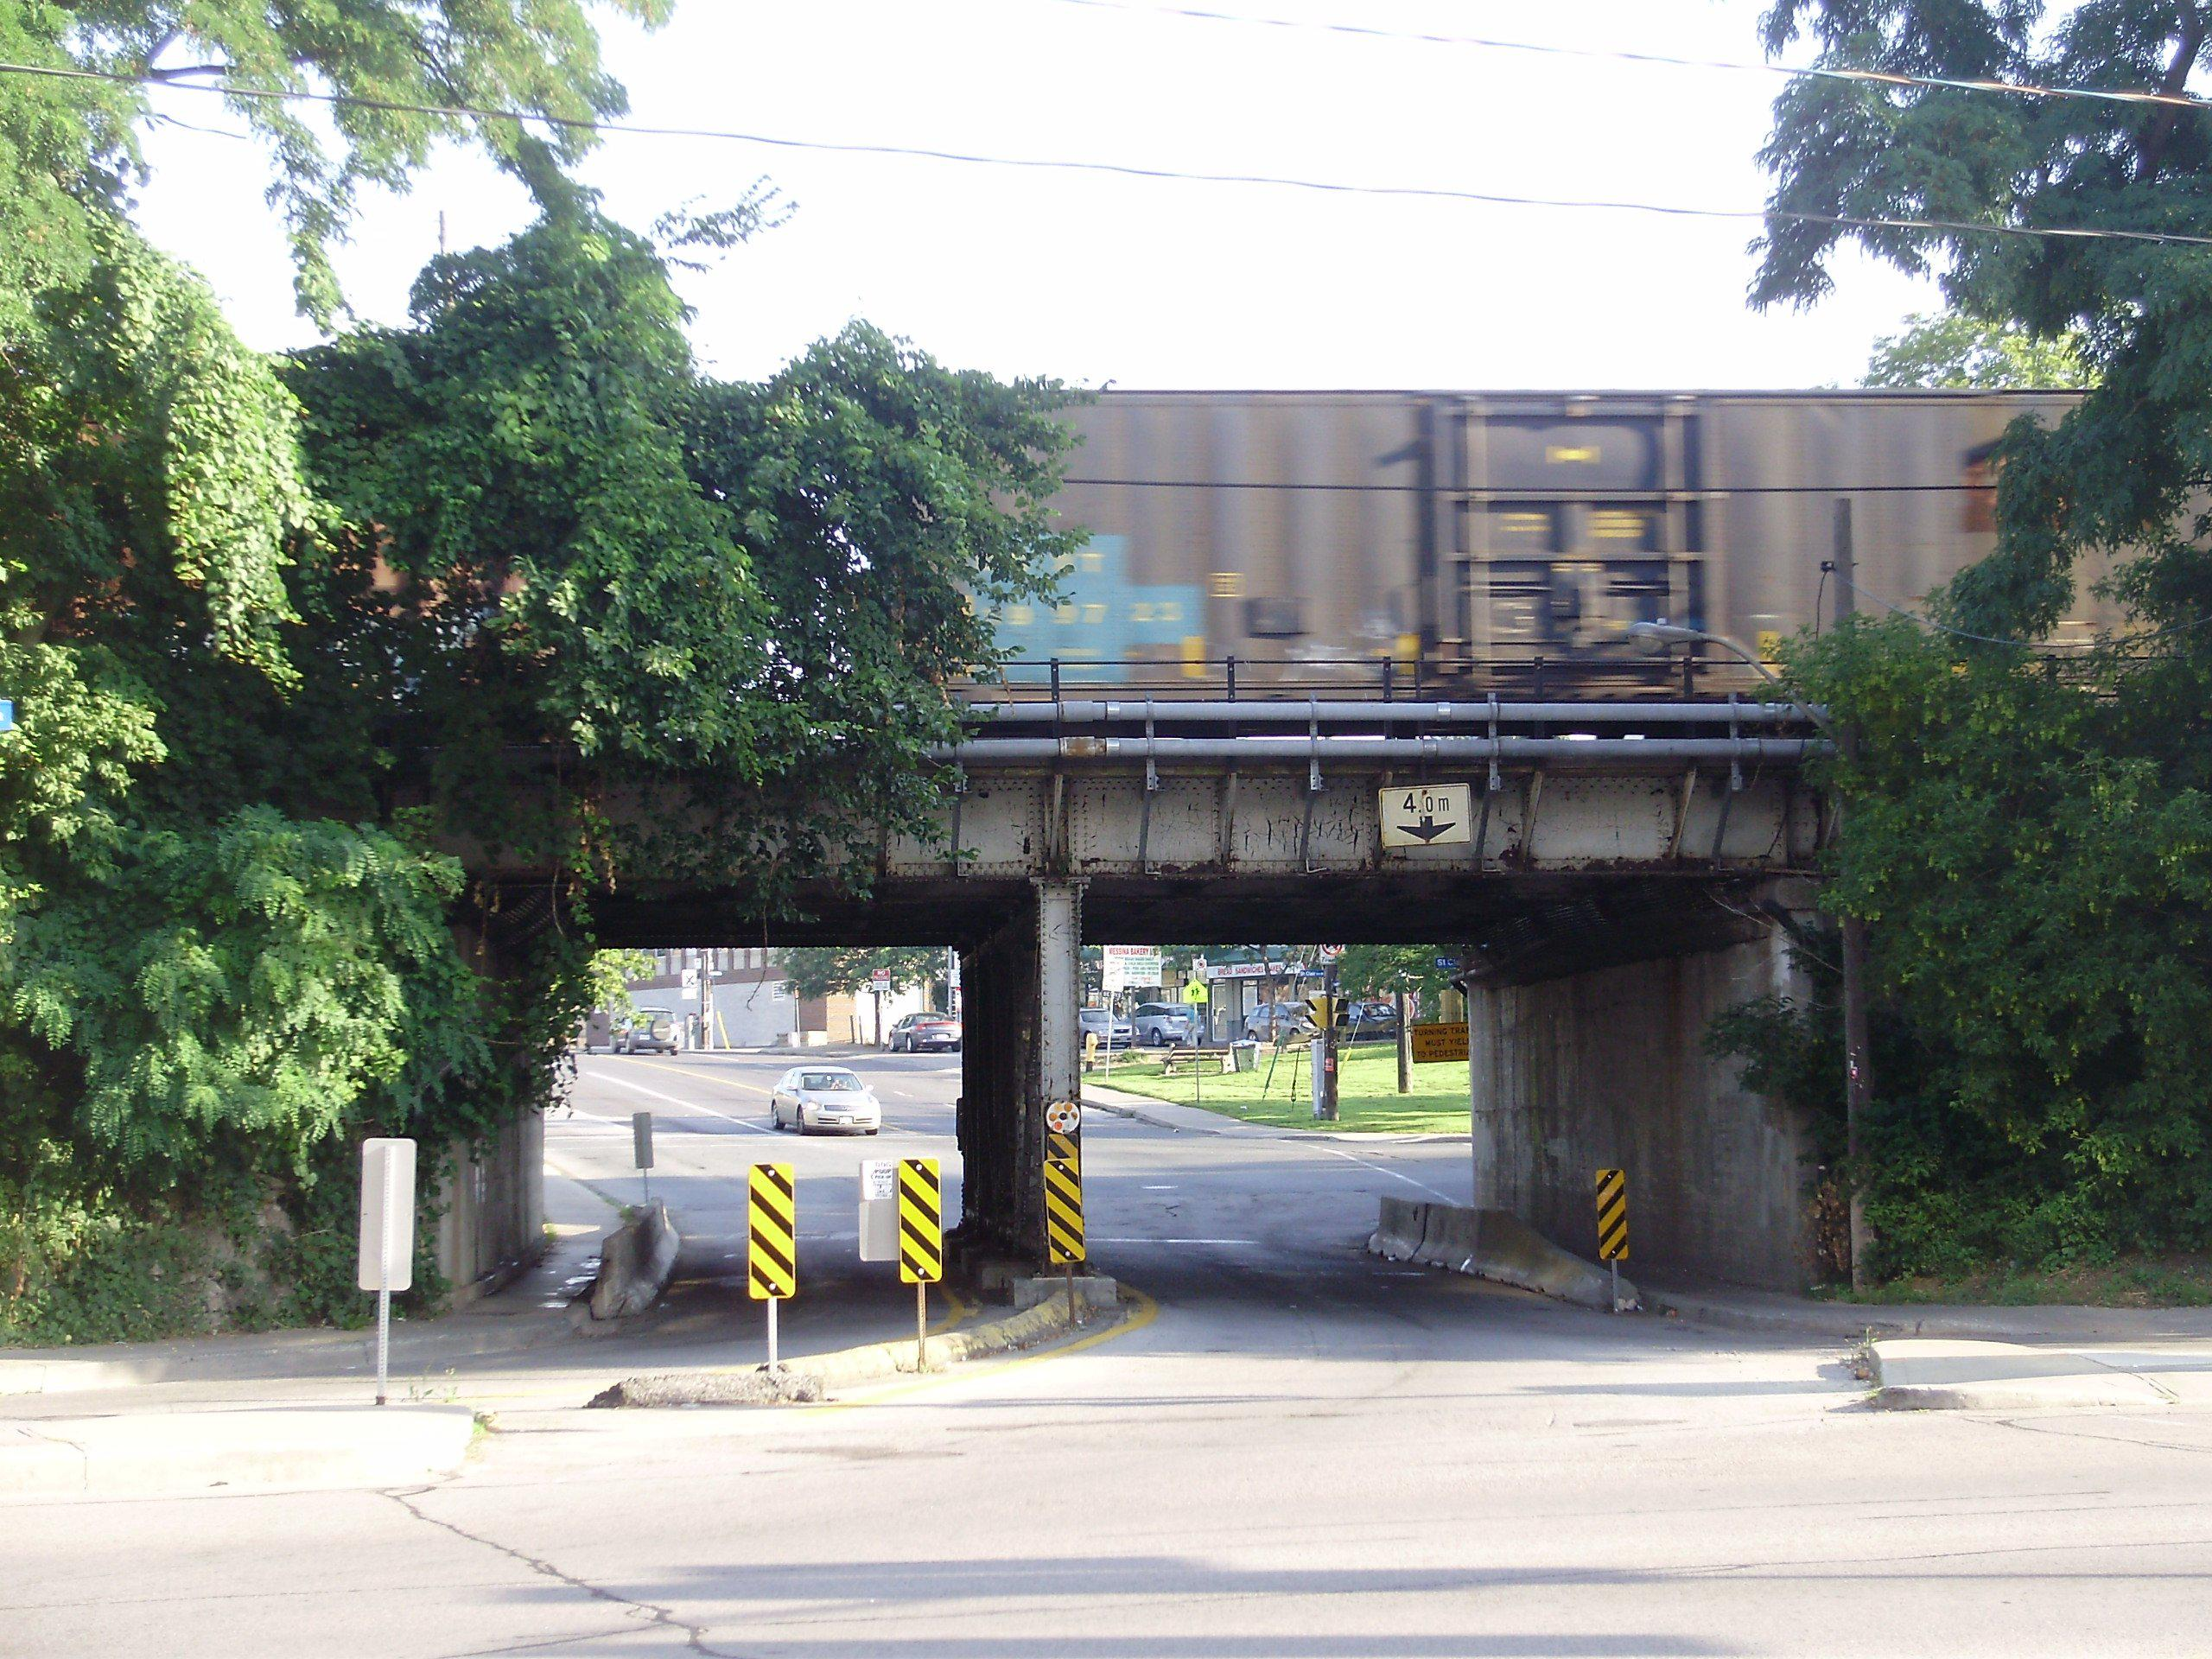

In [12]:
IImage(filename=f'{train_dir}/0.jpg', width = 300, height = 200) 

In [13]:
del df_t['image']
del df_t['image_id']
del df_t['id']
df_t

,caption,path
0,A freight train crossing a railway bridge at t...,/raid/AISSEL/Hamed/datasets/all_topics/train/0...
1,An inbound streetcar at Central Avenue station...,/raid/AISSEL/Hamed/datasets/all_topics/train/1...
2,A Japanese utility cart known as Rearcar jaリヤカ...,/raid/AISSEL/Hamed/datasets/all_topics/train/2...
3,Chrysler PT Cruiser convertible Deutsch Chrysl...,/raid/AISSEL/Hamed/datasets/all_topics/train/3...
4,A public transport bus in Chandigarh English A...,/raid/AISSEL/Hamed/datasets/all_topics/train/4...
...,...,...
3055,Photo taken in the Yellowstone area,/raid/AISSEL/Hamed/datasets/all_topics/train/3...
3056,A pedestrian path along the Vancouver Seawall,/raid/AISSEL/Hamed/datasets/all_topics/train/3...
3057,Stone Mountain Park Georgia USA,/raid/AISSEL/Hamed/datasets/all_topics/train/3...
3058,Black Canyon of the Yellowstone River near Ga...,/raid/AISSEL/Hamed/datasets/all_topics/train/3...


In [14]:
del df_v['image']
del df_v['image_id']
del df_v['id']
df_v

,caption,path
0,Early tram routes through Railway Square Trams...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
1,Model of the bus at InnoTrans 2016 InnoTrans 2...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
2,Captain SMRT Singapores Mass Rapid Transit dem...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
3,Magsaysay Municipal Public Bus Terminal Englis...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
4,A PCC streetcar turning off 36th Street toward...,/raid/AISSEL/Hamed/datasets/all_topics/val/306...
...,...,...
606,Chester A Arthur and party Yellowstone Nationa...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...
607,Deckchairs in Hyde Park London English Hyde Pa...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...
608,Presto card reader at Promenade Terminal Engli...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...
609,One of the Parking decks at Parks Mall English...,/raid/AISSEL/Hamed/datasets/all_topics/val/366...


In [16]:
saved_path = '/home/barzamini/clip_caption/CLIP_prefix_caption/data/aug_wit'
df_t.to_csv(f'{saved_path}/train.tsv', header=False, sep="\t", index=False)
df_v.to_csv(f'{saved_path}/val.tsv', header=False, sep="\t", index=False)

In [85]:
import json

In [86]:
train_json_data = df_t.to_dict('records')

In [88]:
val_json_data = df_v.to_dict('records')

In [90]:
with open("aug_train_wit.json", "w") as final:
    json.dump(train_json_data, final)

In [91]:
with open("aug_val_wit.json", "w") as final:
    json.dump(val_json_data, final)

In [3]:
cal = ['caption', 'image_path']
saved_path = '/home/barzamini/clip_caption/CLIP_prefix_caption/data/aug_wit'
df_t = pd.read_csv(f'{saved_path}/train.tsv', sep='\t', names=cal)
df_v = pd.read_csv(f'{saved_path}/val.tsv', sep='\t', names=cal)


In [25]:
new_p = []
for idx, row in df_t.iterrows():
#     np = row['image_path'].rsplit('/', 2)
#     np = np[]
#     print(idx, "/".join(row['image_path'].rsplit("/", 2)[-2:]))
    new_p.append("/".join(row['image_path'].rsplit("/", 2)[-2:]))
#     "/".join(row['image_path'].split("/", 2)[:2])

In [26]:
df_t['image_path'] = new_p
df_t

,caption,image_path
0,A freight train crossing a railway bridge at t...,train/0.jpg
1,An inbound streetcar at Central Avenue station...,train/1.jpg
2,A Japanese utility cart known as Rearcar jaリヤカ...,train/2.jpg
3,Chrysler PT Cruiser convertible Deutsch Chrysl...,train/3.jpg
4,A public transport bus in Chandigarh English A...,train/4.jpg
...,...,...
3055,Photo taken in the Yellowstone area,train/3055.jpg
3056,A pedestrian path along the Vancouver Seawall,train/3056.jpg
3057,Stone Mountain Park Georgia USA,train/3057.jpg
3058,Black Canyon of the Yellowstone River near Ga...,train/3058.jpg


In [9]:
list_of_single_column = df_t['caption'].tolist()
len(list_of_single_column)

3060

In [10]:
for idx, el in enumerate(list_of_single_column):
    list_of_single_column[idx] = [list_of_single_column[idx]]
list_of_single_column

[['A freight train crossing a railway bridge at the south end of Scarlett Road English A freight train speeds across the railway bridge at the foot of Scarlett Road photographed from Dundas Street West in Toronto Ontario Canada'],
 ['An inbound streetcar at Central Avenue station in 2019 English An inbound streetcar at Central Avenue station in July 2019'],
 ['A Japanese utility cart known as Rearcar jaリヤカー It can be pulled by either human or bicycle 日本にあるリアカー付きの自転車'],
 ['Chrysler PT Cruiser convertible Deutsch Chrysler PT Cruiser Cabrio'],
 ['A public transport bus in Chandigarh English A Tata Marcopolo bus from CTU India'],
 ['Entry to the depot looking back to thecity in August 2008 Southbank tram depot Melbourne Port Melbourne end looking towards city'],
 [' English Gunns Loop for TTC streetcars and buses in Toronto'],
 [' Art of Transportation'],
 ['SMRT Buses Alexander Setanta bodied step entrance SB220LT in Singapore in July 2006 Alexander Setanta Sentanta bodied DAF SB220LT TIB

In [11]:
df_t['captions'] = list_of_single_column
df = df_t[['image_path', 'captions']]
df

,image_path,captions
0,/raid/AISSEL/Hamed/datasets/all_topics/train/0...,[A freight train crossing a railway bridge at ...
1,/raid/AISSEL/Hamed/datasets/all_topics/train/1...,[An inbound streetcar at Central Avenue statio...
2,/raid/AISSEL/Hamed/datasets/all_topics/train/2...,[A Japanese utility cart known as Rearcar jaリヤ...
3,/raid/AISSEL/Hamed/datasets/all_topics/train/3...,[Chrysler PT Cruiser convertible Deutsch Chrys...
4,/raid/AISSEL/Hamed/datasets/all_topics/train/4...,[A public transport bus in Chandigarh English ...
...,...,...
3055,/raid/AISSEL/Hamed/datasets/all_topics/train/3...,[ Photo taken in the Yellowstone area]
3056,/raid/AISSEL/Hamed/datasets/all_topics/train/3...,[A pedestrian path along the Vancouver Seawall ]
3057,/raid/AISSEL/Hamed/datasets/all_topics/train/3...,[ Stone Mountain Park Georgia USA]
3058,/raid/AISSEL/Hamed/datasets/all_topics/train/3...,[ Black Canyon of the Yellowstone River near G...


In [12]:
t_data = df.to_dict('records')

In [13]:
import ndjson

In [15]:
with open('hug_train.json', 'w') as f:
    ndjson.dump(t_data, f)

In [16]:
list_of_single_column = df_v['caption'].tolist()
len(list_of_single_column)

611

In [17]:
for idx, el in enumerate(list_of_single_column):
    list_of_single_column[idx] = [list_of_single_column[idx]]
list_of_single_column

[['Early tram routes through Railway Square Trams and traffic at Railway Square'],
 ['Model of the bus at InnoTrans 2016 InnoTrans 2016  model of the Transit Elevated Bus'],
 ['Captain SMRT Singapores Mass Rapid Transit demonstrating the use of a refurbished C151s emergency detrainment ramp Mascot Captain SMRT posing on a refurbished C151 with emergency detainment ramp deployed'],
 ['Magsaysay Municipal Public Bus Terminal English Magsaysay Municipal Public Bus Terminal'],
 ['A PCC streetcar turning off 36th Street towards the portal in 1976 An unknown member of SEPTA 2700series PCC cars in 10 line service turning into the 36th Street entrance to the downtown trolley subway May 1976'],
 ['Credit to owner Toronto PCC streetcar 4602 and Haagsche TramwegMaatschappij HTM 1329 at the National Capital Trolley Museum English Roaster Photo'],
 ['A passing freight train in 2019 Passing Freight Train'],
 [' English Popular Passenger Stop with frequent freight rail traffic'],
 ['A streetcar in se

In [18]:
df_v['captions'] = list_of_single_column
df = df_v[['image_path', 'captions']]
df

,image_path,captions
0,/raid/AISSEL/Hamed/datasets/all_topics/val/306...,[Early tram routes through Railway Square Tram...
1,/raid/AISSEL/Hamed/datasets/all_topics/val/306...,[Model of the bus at InnoTrans 2016 InnoTrans ...
2,/raid/AISSEL/Hamed/datasets/all_topics/val/306...,[Captain SMRT Singapores Mass Rapid Transit de...
3,/raid/AISSEL/Hamed/datasets/all_topics/val/306...,[Magsaysay Municipal Public Bus Terminal Engli...
4,/raid/AISSEL/Hamed/datasets/all_topics/val/306...,[A PCC streetcar turning off 36th Street towar...
...,...,...
606,/raid/AISSEL/Hamed/datasets/all_topics/val/366...,[Chester A Arthur and party Yellowstone Nation...
607,/raid/AISSEL/Hamed/datasets/all_topics/val/366...,[Deckchairs in Hyde Park London English Hyde P...
608,/raid/AISSEL/Hamed/datasets/all_topics/val/366...,[Presto card reader at Promenade Terminal Engl...
609,/raid/AISSEL/Hamed/datasets/all_topics/val/366...,[One of the Parking decks at Parks Mall Englis...


In [19]:
v_data = df.to_dict('records')

In [20]:
with open('hug_val.json', 'w') as f:
    ndjson.dump(v_data, f)